In [1]:
species_model_matrix = defaultdict(lambda: {"EfficientNet-B0": 0, "MobileNetV2": 0, "ViT-B16": 0, "CoaT-Lite Medium": 0})
for s1, s2, model in confused_pairs:
    species_model_matrix[s1][model] = 1
    species_model_matrix[s2][model] = 1

species_df = pd.DataFrame.from_dict(species_model_matrix, orient="index")
species_df = species_df.sort_index()

species_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Confused Species Across Models")
plt.ylabel("Confused (1 = Yes)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


NameError: name 'defaultdict' is not defined

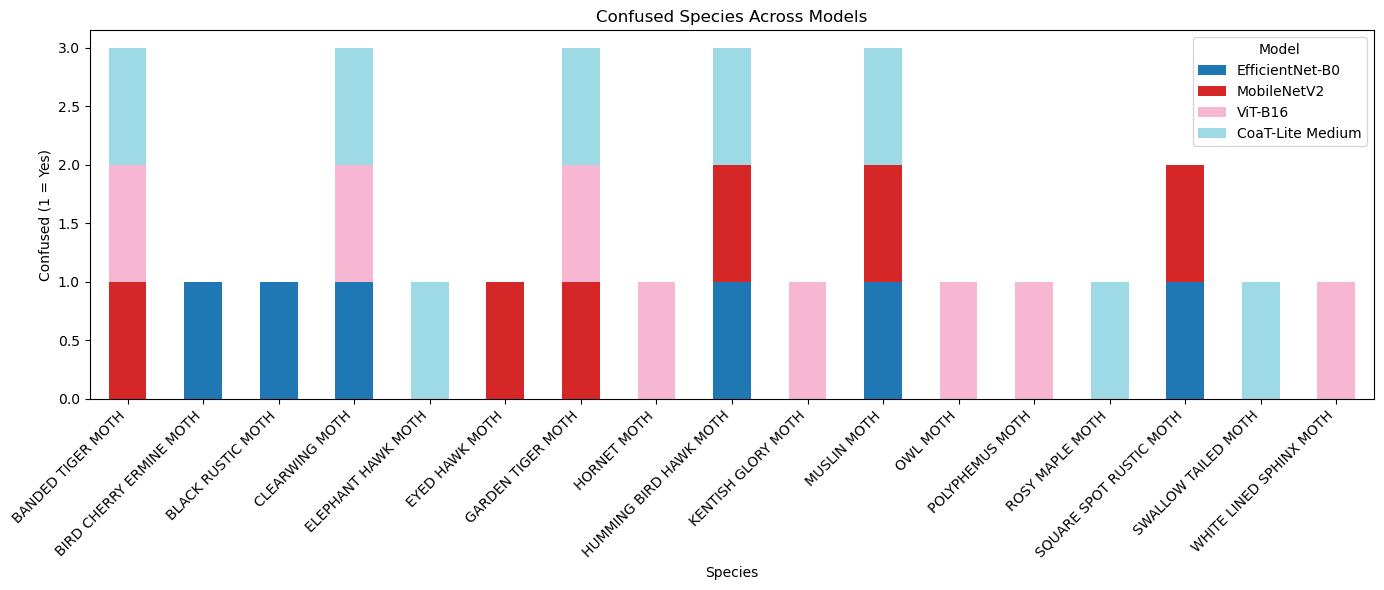

In [11]:

from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Define confused pairs from all models
confused_pairs = [
    # EfficientNet-B0
    ("CLEARWING MOTH", "HUMMING BIRD HAWK MOTH", "EfficientNet-B0"),
    ("HUMMING BIRD HAWK MOTH", "BLACK RUSTIC MOTH", "EfficientNet-B0"),
    ("MUSLIN MOTH", "BIRD CHERRY ERMINE MOTH", "EfficientNet-B0"),
    ("SQUARE SPOT RUSTIC MOTH", "BLACK RUSTIC MOTH", "EfficientNet-B0"),

    # MobileNetV2
    ("BANDED TIGER MOTH", "GARDEN TIGER MOTH", "MobileNetV2"),
    ("HUMMING BIRD HAWK MOTH", "EYED HAWK MOTH", "MobileNetV2"),
    ("MUSLIN MOTH", "SQUARE SPOT RUSTIC MOTH", "MobileNetV2"),

    # ViT-B16
    ("CLEARWING MOTH", "HORNET MOTH", "ViT-B16"),
    ("GARDEN TIGER MOTH", "BANDED TIGER MOTH", "ViT-B16"),
    ("KENTISH GLORY MOTH", "WHITE LINED SPHINX MOTH", "ViT-B16"),
    ("POLYPHEMUS MOTH", "OWL MOTH", "ViT-B16"),

    # CoaT-Lite Medium
    ("BANDED TIGER MOTH", "GARDEN TIGER MOTH", "CoaT-Lite Medium"),
    ("CLEARWING MOTH", "HUMMING BIRD HAWK MOTH", "CoaT-Lite Medium"),
    ("ELEPHANT HAWK MOTH", "ROSY MAPLE MOTH", "CoaT-Lite Medium"),
    ("SWALLOW TAILED MOTH", "MUSLIN MOTH", "CoaT-Lite Medium")
]


# Create matrix
species_model_matrix = defaultdict(lambda: {
    "EfficientNet-B0": 0,
    "MobileNetV2": 0,
    "ViT-B16": 0,
    "CoaT-Lite Medium": 0
})

for s1, s2, model in confused_pairs:
    species_model_matrix[s1][model] = 1
    species_model_matrix[s2][model] = 1

species_df = pd.DataFrame.from_dict(species_model_matrix, orient="index")
species_df = species_df.sort_index()

# Plot
species_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Confused Species Across Models")
plt.ylabel("Confused (1 = Yes)")
plt.xlabel("Species")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


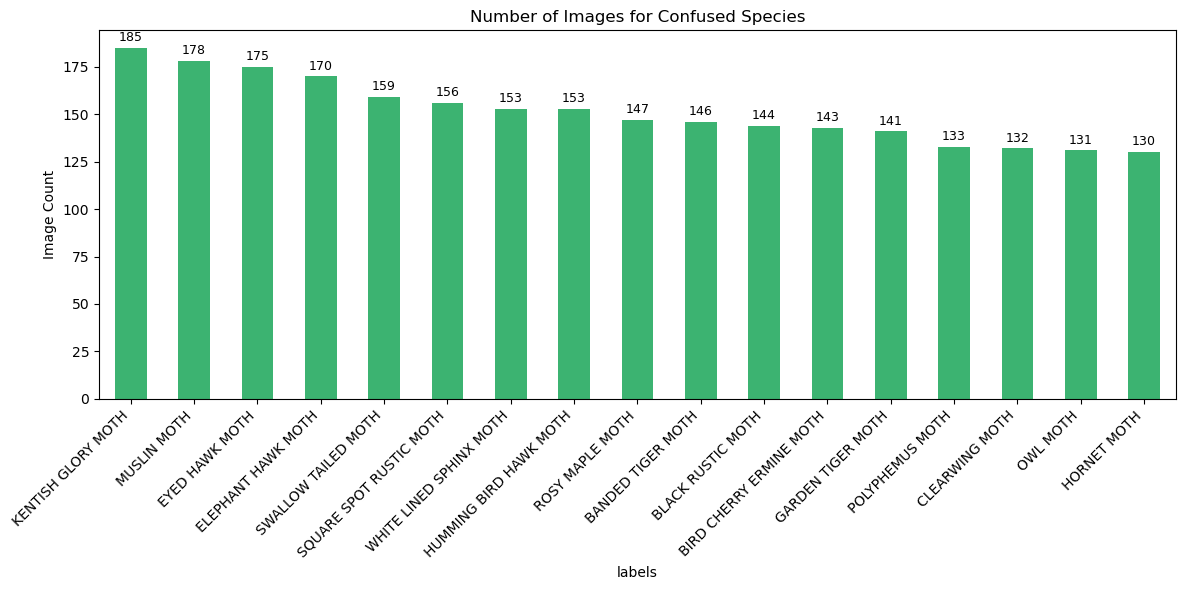

In [8]:
from pathlib import Path 
import pandas as pd
import matplotlib.pyplot as plt

# Define universal path to data
data_root = Path("../data/kaggle-dataset/archive")
csv_path = data_root / "MOTHS.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Replace with your actual label column name
label_col = 'labels'  

# Count images per species
species_counts = df[label_col].value_counts().sort_values(ascending=False)

# confused species list from new top-4 model results
confused_species = [
    "BANDED TIGER MOTH",
    "BIRD CHERRY ERMINE MOTH",
    "BLACK RUSTIC MOTH",
    "CLEARWING MOTH",
    "ELEPHANT HAWK MOTH",
    "EYED HAWK MOTH",
    "GARDEN TIGER MOTH",
    "HORNET MOTH",
    "HUMMING BIRD HAWK MOTH",
    "KENTISH GLORY MOTH",
    "MUSLIN MOTH",
    "OWL MOTH",
    "POLYPHEMUS MOTH",
    "ROSY MAPLE MOTH",
    "SQUARE SPOT RUSTIC MOTH",
    "SWALLOW TAILED MOTH",
    "WHITE LINED SPHINX MOTH"
]

# Filter to confused species
confused_counts = species_counts[species_counts.index.isin(confused_species)].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = confused_counts.plot(kind='bar', color='mediumseagreen')

# Annotate counts under bars
for i, (label, count) in enumerate(confused_counts.items()):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=9, rotation=0)

plt.title("Number of Images for Confused Species")
plt.ylabel("Image Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


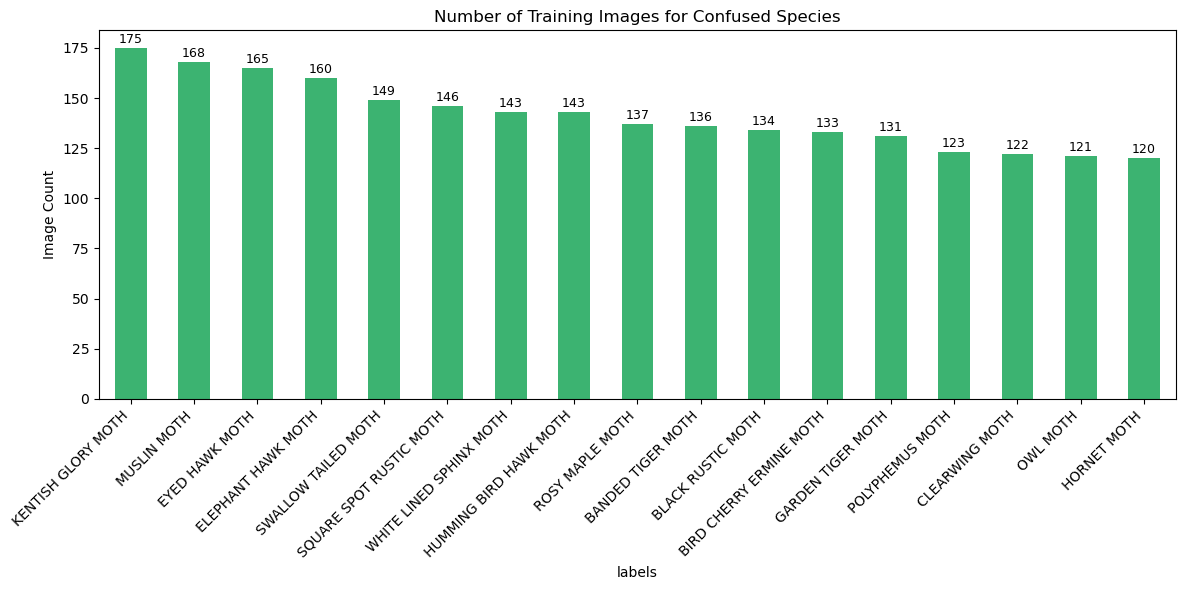

In [10]:
from pathlib import Path  
import pandas as pd
import matplotlib.pyplot as plt

# Define universal path to data
data_root = Path("../data/kaggle-dataset/archive")
csv_path = data_root / "MOTHS.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Columns in your CSV
label_col = 'labels'
dataset_col = 'data set'

# Filter only training data
df_train = df[df[dataset_col] == 'train']

# Count training images per species
species_counts_train = df_train[label_col].value_counts().sort_values(ascending=False)

# Confused species list from new top-4 model results
confused_species = [
    "BANDED TIGER MOTH",
    "BIRD CHERRY ERMINE MOTH",
    "BLACK RUSTIC MOTH",
    "CLEARWING MOTH",
    "ELEPHANT HAWK MOTH",
    "EYED HAWK MOTH",
    "GARDEN TIGER MOTH",
    "HORNET MOTH",
    "HUMMING BIRD HAWK MOTH",
    "KENTISH GLORY MOTH",
    "MUSLIN MOTH",
    "OWL MOTH",
    "POLYPHEMUS MOTH",
    "ROSY MAPLE MOTH",
    "SQUARE SPOT RUSTIC MOTH",
    "SWALLOW TAILED MOTH",
    "WHITE LINED SPHINX MOTH"
]

# Filter to confused species
confused_counts_train = species_counts_train[
    species_counts_train.index.isin(confused_species)
].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = confused_counts_train.plot(kind='bar', color='mediumseagreen')

# Annotate counts above bars
for i, (label, count) in enumerate(confused_counts_train.items()):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=9)

plt.title("Number of Training Images for Confused Species")
plt.ylabel("Image Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


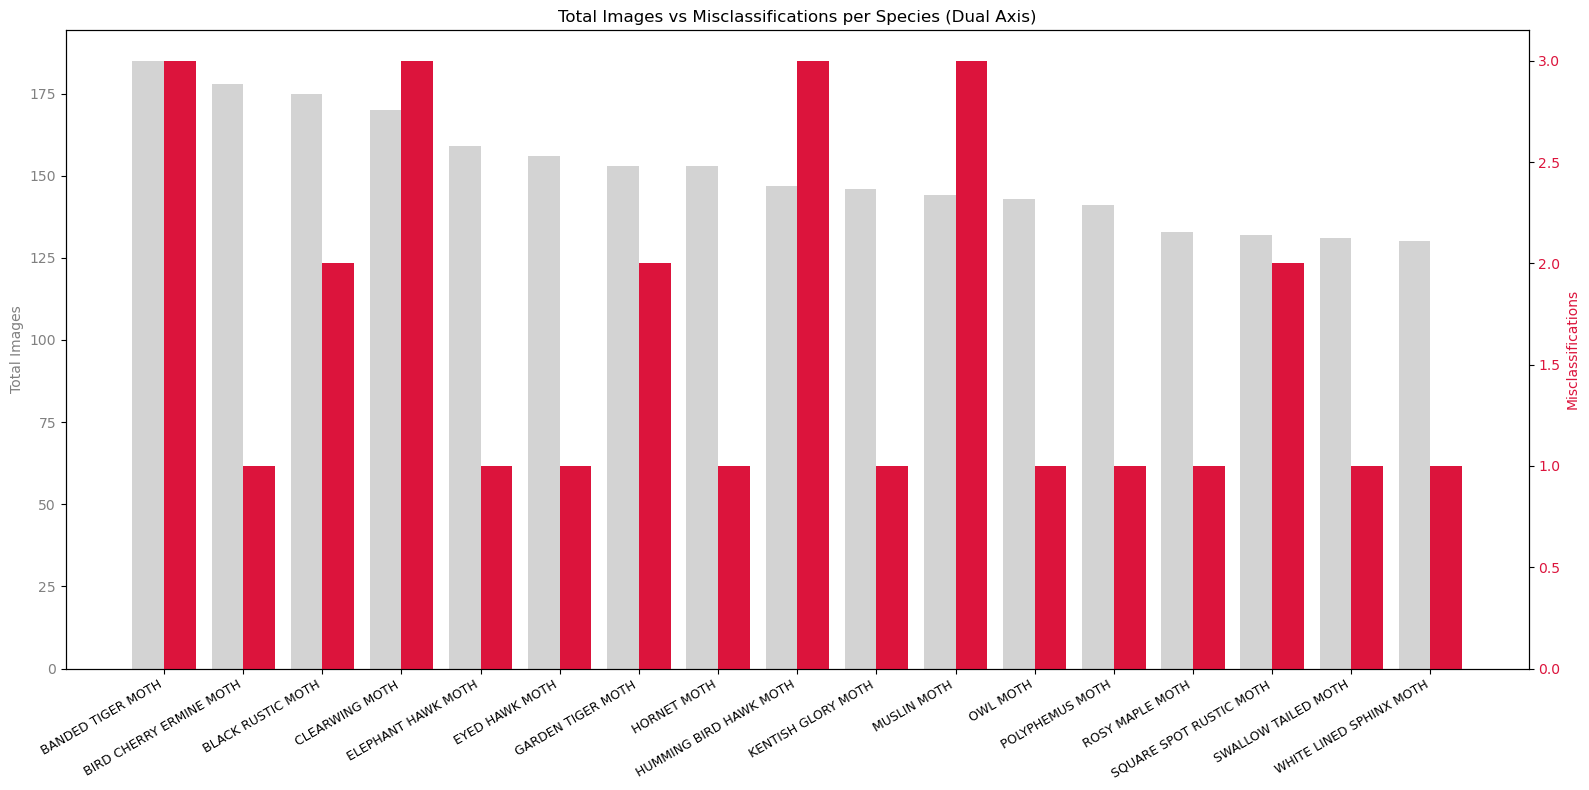

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# New species counts
species_counts = {
    "BANDED TIGER MOTH": 185,
    "BIRD CHERRY ERMINE MOTH": 178,
    "BLACK RUSTIC MOTH": 175,
    "CLEARWING MOTH": 170,
    "ELEPHANT HAWK MOTH": 159,
    "EYED HAWK MOTH": 156,
    "GARDEN TIGER MOTH": 153,
    "HORNET MOTH": 153,
    "HUMMING BIRD HAWK MOTH": 147,
    "KENTISH GLORY MOTH": 146,
    "MUSLIN MOTH": 144,
    "OWL MOTH": 143,
    "POLYPHEMUS MOTH": 141,
    "ROSY MAPLE MOTH": 133,
    "SQUARE SPOT RUSTIC MOTH": 132,
    "SWALLOW TAILED MOTH": 131,
    "WHITE LINED SPHINX MOTH": 130
}

# Misclassified counts based on model confusion reports
misclassified_counts = {
    "BANDED TIGER MOTH": 3,
    "BIRD CHERRY ERMINE MOTH": 1,
    "BLACK RUSTIC MOTH": 2,
    "CLEARWING MOTH": 3,
    "ELEPHANT HAWK MOTH": 1,
    "EYED HAWK MOTH": 1,
    "GARDEN TIGER MOTH": 2,
    "HORNET MOTH": 1,
    "HUMMING BIRD HAWK MOTH": 3,
    "KENTISH GLORY MOTH": 1,
    "MUSLIN MOTH": 3,
    "OWL MOTH": 1,
    "POLYPHEMUS MOTH": 1,
    "ROSY MAPLE MOTH": 1,
    "SQUARE SPOT RUSTIC MOTH": 2,
    "SWALLOW TAILED MOTH": 1,
    "WHITE LINED SPHINX MOTH": 1
}


# Build dataframe
df = pd.DataFrame({
    "Species": list(species_counts.keys()),
    "Total Images": list(species_counts.values()),
    "Misclassifications": [misclassified_counts.get(sp, 0) for sp in species_counts.keys()]
}).sort_values("Total Images", ascending=False)

# Plot with secondary y-axis
fig, ax1 = plt.subplots(figsize=(16, 8))
x = range(len(df))

# Total images bar
ax1.bar(x, df["Total Images"], width=0.4, label="Total Images", color="lightgrey")
ax1.set_ylabel("Total Images", color="grey")
ax1.tick_params(axis='y', labelcolor="grey")

# Misclassifications bar on secondary axis
ax2 = ax1.twinx()
ax2.bar([i + 0.4 for i in x], df["Misclassifications"], width=0.4, label="Misclassifications", color="crimson")
ax2.set_ylabel("Misclassifications", color="crimson")
ax2.tick_params(axis='y', labelcolor="crimson")

# X-axis labels
tick_locs = [i + 0.2 for i in x]
ax1.set_xticks(tick_locs)
ax1.set_xticklabels(df["Species"], rotation=30, ha="right", fontsize=9)

# Title and layout
plt.title("Total Images vs Misclassifications per Species (Dual Axis)")
fig.tight_layout()
plt.show()


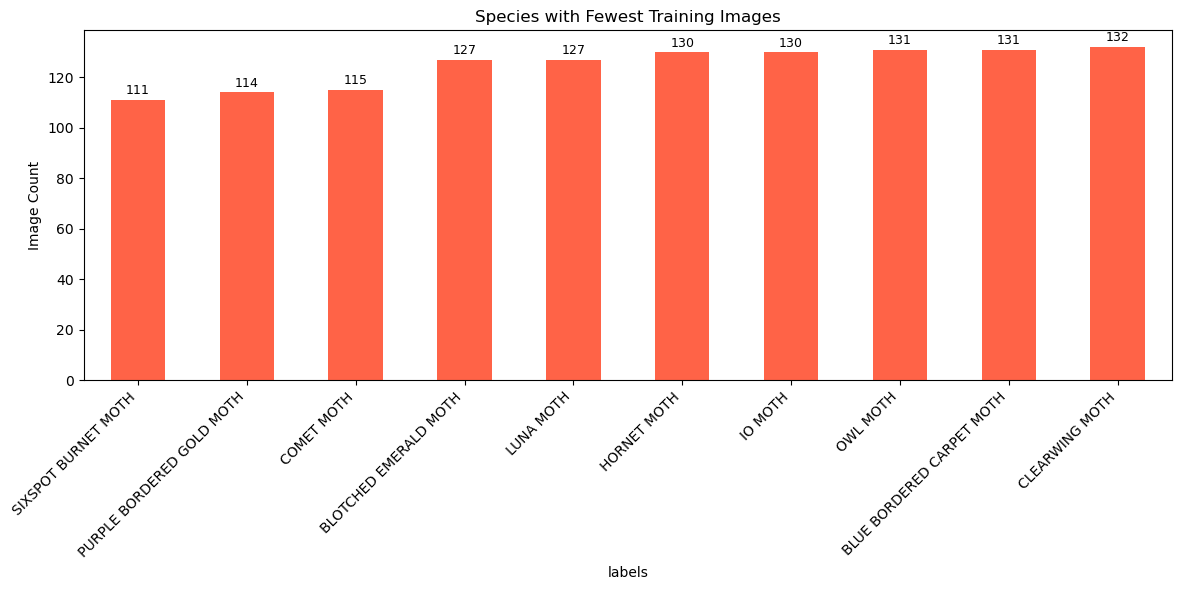

Species with fewest images:
labels
SIXSPOT BURNET MOTH          111
PURPLE BORDERED GOLD MOTH    114
COMET MOTH                   115
BLOTCHED EMERALD MOTH        127
LUNA MOTH                    127
HORNET MOTH                  130
IO MOTH                      130
OWL MOTH                     131
BLUE BORDERED CARPET MOTH    131
CLEARWING MOTH               132
Name: count, dtype: int64


In [1]:
from pathlib import Path 
import pandas as pd
import matplotlib.pyplot as plt

# Define universal path to data
data_root = Path("../data/kaggle-dataset/archive")
csv_path = data_root / "MOTHS.csv"

# Load CSV
df = pd.read_csv(csv_path)

label_col = 'labels'  

# Count images per species (all species)
species_counts = df[label_col].value_counts().sort_values()

# Get the species with the fewest images
rarest_species = species_counts.head(10)  

# Plot
plt.figure(figsize=(12, 6))
ax = rarest_species.plot(kind='bar', color='tomato')
s
for i, (label, count) in enumerate(rarest_species.items()):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=9, rotation=0)

plt.title("Species with Fewest Training Images")
plt.ylabel("Image Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Print exact result
print(f"Species with fewest images:\n{rarest_species}")
